In [40]:
# Import libraries
from collections import Counter, OrderedDict
from itertools import chain
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.rcParams["font.size"] = 15
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 500)
pd.options.display.max_colwidth = 1000
import random
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [41]:
# Path to file
hotels_path = "../data/clean_hotels_scraped_v2.csv"

# Dataframe
hotels_df = pd.read_csv(hotels_path, usecols = ["city", "country", "hotel_name", "rating", 
                                                "address", "popularity_rating", "locality", "price",
                                               "landmark", "URL"])

# Sanity check
hotels_df.head()

,city,country,hotel_name,rating,address,popularity_rating,locality,price,landmark,URL
0,Mutterstadt,Germany,RheinCity Hotel,4.0,"Zollhofstraße 11, Ludwigshafen, RP, 67059, Germany",4.0,Ludwigshafen,107.0,"['5.4 miles to mutterstadt, 3.3 miles to mannheim (mhg)']",https://www.hotels.com/ho804141952/?q-check-out=2020-08-29&FPQ=3&q-check-in=2020-08-27&WOE=6&WOD=4&q-room-0-children=0&pa=1&tab=description&JHR=3&q-room-0-adults=2&YGF=14&MGT=2&ZSX=0&SYE=3
1,Mutterstadt,Germany,NYX Hotel Mannheim by Leonardo Hotels,4.0,"F4, 4-11, Mannheim, BW, 68159, Germany",14.0,Mannheim,78.0,"['6.2 miles to mutterstadt, 2.8 miles to mannheim (mhg)']",https://www.hotels.com/ho408334/?q-check-out=2020-08-29&FPQ=2&q-check-in=2020-08-27&WOE=6&WOD=4&q-room-0-children=0&pa=2&tab=description&JHR=2&q-room-0-adults=2&YGF=14&MGT=2&ZSX=0&SYE=3
2,Mutterstadt,Germany,"Radisson Blu Hotel, Mannheim",4.5,"Quadrant Q7, 27, Mannheim, 68161, Germany",387.0,Mannheim,130.0,"['6.4 miles to mutterstadt, 2.3 miles to mannheim (mhg)']",https://www.hotels.com/ho626280/?pa=3&tab=description&q-room-0-adults=2&intlid=SoldOutListing&ZSX=0&SYE=3&q-room-0-children=0
3,Mutterstadt,Germany,ACHAT Comfort Frankenthal/Pfalz,3.5,"Mahlastrasse 18, Frankenthal, RP, 67227, Germany",64.0,Frankenthal,83.0,"['5.9 miles to mutterstadt, 8.3 miles to mannheim (mhg)']",https://www.hotels.com/ho180949/?q-check-out=2020-08-29&FPQ=2&q-check-in=2020-08-27&WOE=6&WOD=4&q-room-0-children=0&pa=4&tab=description&JHR=2&q-room-0-adults=2&YGF=14&MGT=2&ZSX=0&SYE=3
4,Mutterstadt,Germany,Relax Apartment,4.0,"F4 14-15, Mannheim, 68159, Germany",175.0,Mannheim,130.0,"['6.2 miles to mutterstadt, 2.7 miles to mannheim (mhg)']",https://www.hotels.com/ho685840/?q-check-out=2020-08-29&FPQ=2&q-check-in=2020-08-27&WOE=6&WOD=4&q-room-0-children=0&pa=5&tab=description&JHR=2&q-room-0-adults=2&YGF=14&MGT=2&ZSX=0&SYE=3


In [42]:
# Prepare city column

city_list = hotels_df["city"].tolist()

# Find set of unique cities and convert to a list
unique_cities = list(set(city_list))

# Create indexes for each city
city_index = {city: idx for idx, city in enumerate(unique_cities)}
index_city = {idx: city for city, idx in city_index.items()}

# Prepare country column

# Strip whitespace
hotels_df["country"] = hotels_df["country"].apply(lambda x: x.strip())

country_list = hotels_df["country"].tolist()

# Find set of unique countries and convert to a list
unique_countries = list(set(country_list))

# Create indexes for each property
country_index = {country: idx for idx, country in enumerate(unique_countries)}
index_country = {idx: country for country, idx in country_index.items()}

# Prepare hotel_name column

# Create hotel names list
hotels_list = hotels_df["hotel_name"].tolist()

# Unique hotels
unique_hotels = list(set(hotels_list))

# Create indexes for each hotel
hotel_index = {hotel: idx for idx, hotel in enumerate(unique_hotels)}
index_hotel = {idx: hotel for hotel, idx in hotel_index.items()}

# Create ratings list
rating_list = hotels_df["rating"].tolist()

# Find set of unique ratings and convert to a list
unique_ratings = list(set(rating_list))

# Create indexes for each rating
rating_index = {rating: idx for idx, rating in enumerate(unique_ratings)}
index_rating = {idx: rating for rating, idx in rating_index.items()}

# Create popularity ratings list
popularity_list = hotels_df["popularity_rating"].tolist()

# Find set of unique ratings and convert to a list
unique_popularity = list(set(popularity_list))

# Create indexes for each rating
popularity_index = {popularity: idx for idx, popularity in enumerate(unique_popularity)}
index_popularity = {idx: popularity for popularity, idx in popularity_index.items()}

# Prepare locality column

# Create hotel names list
locality_list = hotels_df["locality"].tolist()
unique_localities = list(set(locality_list))

# Create indexes for each hotel
locality_index = {locality: idx for idx, locality in enumerate(unique_localities)}
index_locality = {idx: locality for locality, idx in locality_index.items()}

# Create price list
price_list = hotels_df["price"].tolist()

# Unique prices
unique_prices = list(set(price_list))

# Create indexes for each price
price_index = {price: idx for idx, price in enumerate(unique_prices)}
index_price = {idx: price for price, idx in price_index.items()}

# Prepare locality column

# Create hotel names list
landmark_list = hotels_df["landmark"].tolist()

# Find set of unique properties and convert to a list
unique_landmarks = list(chain(*[list(set(landmarks)) for landmarks in landmark_list]))
unique_landmarks = list(set(unique_landmarks))

# Create indexes for each hotel
landmark_index = {landmark: idx for idx, landmark in enumerate(unique_landmarks)}
index_landmark = {idx: landmark for landmark, idx in landmark_index.items()}

In [43]:
# Import embeddings model and weights
embeddings_model = models.load_model("../models/embeddings_fourth_attempt.h5")
embeddings_model.load_weights("../models/embeddings_fourth_attempt_weights.h5")

In [44]:
# Extract embeddings
city_layer = embeddings_model.get_layer("city_embedding")
city_weights = city_layer.get_weights()[0]
country_layer = embeddings_model.get_layer("country_embedding")
country_weights = country_layer.get_weights()[0]
hotel_layer = embeddings_model.get_layer("hotel_embedding")
hotel_weights = hotel_layer.get_weights()[0]
rating_layer = embeddings_model.get_layer("rating_embedding")
rating_weights = rating_layer.get_weights()[0]
popularity_layer = embeddings_model.get_layer("popularity_embedding")
popularity_weights = popularity_layer.get_weights()[0]
locality_layer = embeddings_model.get_layer("locality_embedding")
locality_weights = locality_layer.get_weights()[0]
price_layer = embeddings_model.get_layer("price_embedding")
price_weights = price_layer.get_weights()[0]
landmark_layer = embeddings_model.get_layer("landmark_embedding")
landmark_weights = landmark_layer.get_weights()[0]

# Normalize the embeddings so that we can calculate cosine similarity
city_weights = city_weights / np.linalg.norm(city_weights, axis = 1).reshape((-1, 1))
country_weights = country_weights / np.linalg.norm(country_weights, axis = 1).reshape((-1, 1))
hotel_weights = hotel_weights / np.linalg.norm(hotel_weights, axis = 1).reshape((-1, 1))
rating_weights = rating_weights / np.linalg.norm(rating_weights, axis =1 ).reshape((-1, 1))
popularity_weights = popularity_weights / np.linalg.norm(popularity_weights, axis =1 ).reshape((-1, 1))
locality_weights = locality_weights / np.linalg.norm(locality_weights, axis =1 ).reshape((-1, 1))
price_weights = price_weights / np.linalg.norm(price_weights, axis =1 ).reshape((-1, 1))
landmark_weights = landmark_weights / np.linalg.norm(landmark_weights, axis =1 ).reshape((-1, 1))

In [45]:
# Finding similar hotels
def find_similar_hotels(name, weights, index_name = "hotel", n = 5, return_dist = False, plot = False):
    
    # Select index and reverse index
    if index_name == "city":
        index = city_index
        rindex = index_city
    if index_name == "country":
        index = country_index
        rindex = index_country
    if index_name == "hotel":
        index = hotel_index
        rindex = index_hotel
    if index_name == "rating":
        index = rating_index
        rindex = index_rating
    if index_name == "popularity":
        index = popularity_index
        rindex = index_popularity
    if index_name == "locality":
        index = locality_index
        rindex = index_locality
    if index_name == "price":
        index = price_index
        rindex = index_price
    if index_name == "landmark":
        index = landmark_index
        rindex = index_landmark
    
    
    # Check name is in index
    try:
        # Calculate dot product between item/property and all others
        distances = np.dot(weights, weights[index[name]])
    except KeyError:
        print(" {} Not Found.".format(name))
        return
    
    # Sort distances from smallest to largest
    sorted_distances = np.argsort(distances)

    # Plot results if True
    if plot:
        # Find closest and most far away item
        far_away = sorted_distances[:n // 2]
        closest = sorted_distances[-n-1: len(distances) - 1]
        to_plot = [rindex[c] for c in far_away]
        to_plot.extend(rindex[c] for c in closest)
        
        # Find distances 
        dist = [distances[c] for c in far_away]
        dist.extend(distances[c] for c in closest)
        
        # Colors
        colors = ["hotpink" for _ in range(n // 2)]
        colors.extend("darkturquoise" for _ in range(n))
        
        # Data in DataFrame
        data = pd.DataFrame({"distance": dist}, index = to_plot)
        
        # Bar chart
        data["distance"].plot.barh(color = colors, figsize = (10, 8), edgecolor = "k", linewidth = 2)
        plt.xlabel("Cosine Similarity");
        plt.axvline(x = 0, color = "k");
        
        # Title
        name_str = "Most and Least Similar to {}".format(name)
        plt.title(name_str, x = 0.2, size = 28, y = 1.05)
        
        return None
    
    # Find the most similar
    closest = sorted_distances[-n:]

    # If return_dist True
    if return_dist:
        return distances, closest
    
    # Print the most similar and distances
    for c in reversed(closest):
        print("{}: {} Similarity: {}".format(index_name.capitalize(), rindex[c], round(distances[c], 2)))
              

In [28]:
find_similar_hotels("Hôtel Henriette", hotel_weights)

Hotel: Hôtel Henriette Similarity: 1.0
Hotel: Bambuda Lodge - Hostel Similarity: 0.6200000047683716
Hotel: Hotel Rossi Similarity: 0.4699999988079071
Hotel: Hotel Odeon Similarity: 0.46000000834465027
Hotel: Farmis Garden Hotel & Restaurant Similarity: 0.44999998807907104


In [30]:
# Use PCA
pca = PCA(n_components = 4)
pca_result = pca.fit_transform(hotel_weights)

pca_df = pd.DataFrame(columns = ["pc1", "pc2", "pc3", "pc4"])

pca_df["pc1"] = pca_result[:, 0]
pca_df["pc2"] = pca_result[:, 1]
pca_df["pc3"] = pca_result[:, 2]
pca_df["pc4"] = pca_result[:, 3]

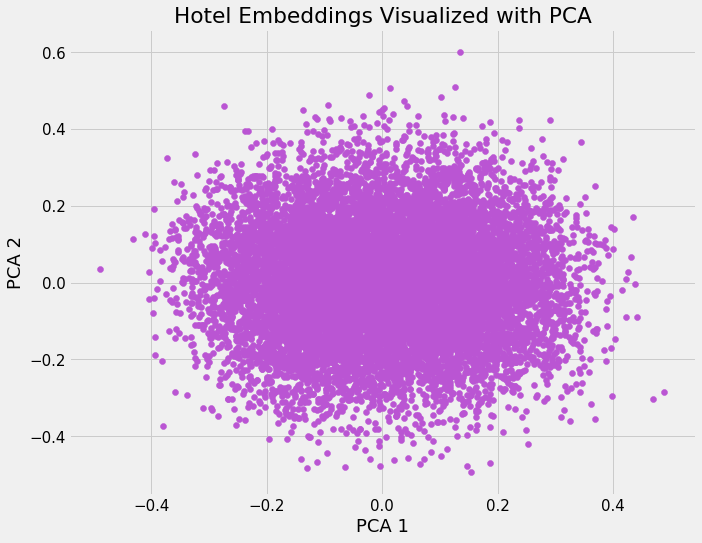

In [31]:
# Visualize PCA output
plt.figure(figsize = (10, 8))
plt.scatter(pca_df["pc1"], pca_df["pc2"], c = "mediumorchid")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2"); plt.title("Hotel Embeddings Visualized with PCA");

In [35]:
def count_items(list_items):
    
    # Create a counter object
    counts = Counter(list_items)
    
    # Sort by highest count first and place in ordered dictionary
    counts = sorted(counts.items(), key = lambda x: x[1], reverse = True)
    counts = OrderedDict(counts)
    
    return counts

In [46]:
# Get top ten cities
city_counts = count_items(city_list)
list(city_counts.items())[:20]

# Include 10 most popular cities
cities_to_include = list(city_counts.keys())[:20]

idx_include = []
cities = []

for index, row in hotels_df.iterrows():
    if hotels_df.at[index, "city"] in cities_to_include:
        idx_include.append(index)
        cities.append(hotels_df.at[index, "city"])
            
len(idx_include)

2774

In [47]:
# Map cities to integers to plot them as colors
ints, cities = pd.factorize(cities)
cities[:5]

array(['Paris', 'Vatican City', 'Florence', 'Opfikon',
       'Caramagna Piemonte'], dtype=object)

In [49]:
plt.figure(figsize = (10, 8))

# Plot embedding
plt.scatter(pca_result[idx_include, 0], pca_result[idx_include, 1], 
            c = ints, cmap = plt.cm.tab10)

# Add colorbar and appropriate labels
cbar = plt.colorbar()
cbar.set_ticks([])
for j, lab in enumerate(gen):
    cbar.ax.text(1, (2 * j + 1) / ((10) * 2), lab, ha='left', va='center')
cbar.ax.set_title('Genre', loc = 'left')


plt.xlabel('TSNE 1'); plt.ylabel('TSNE 2'); plt.title('TSNE Visualization of Book Embeddings');

IndexError: index 17623 is out of bounds for axis 0 with size 12787

<Figure size 720x576 with 0 Axes>